In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ad =  pd.read_csv('admission_data.csv')
ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


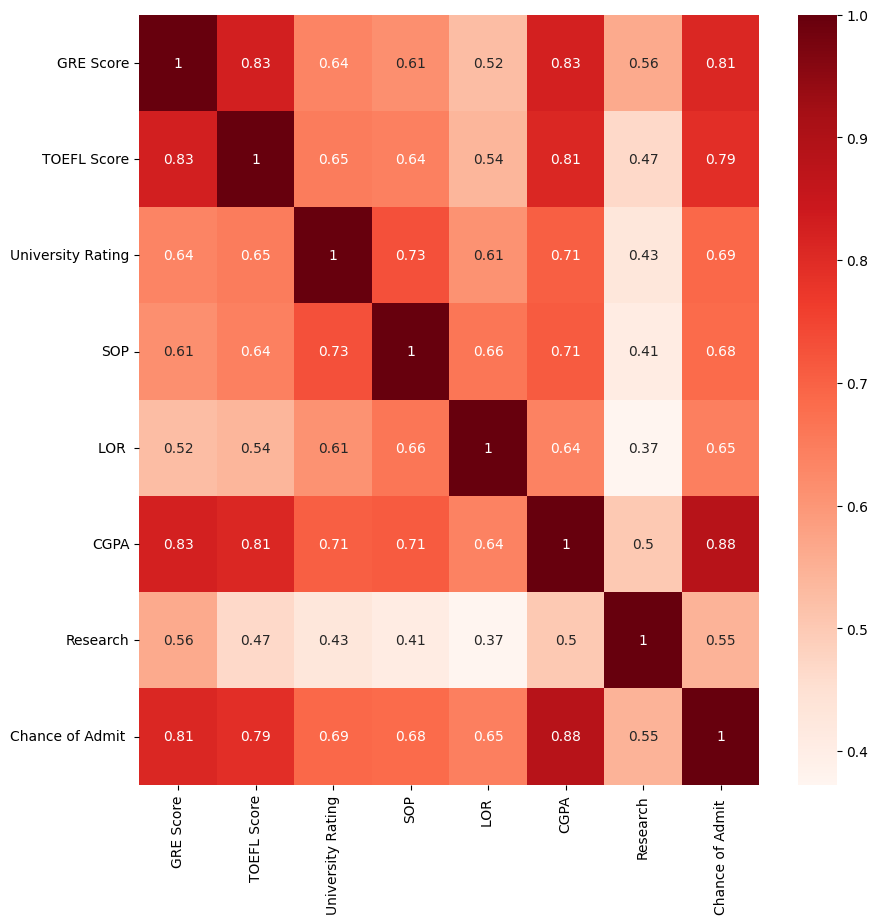

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(ad.corr(),cmap="Reds",annot=True)
plt.show()

<ipython-input-31-255c26686ad7>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=ad['GRE Score'],y=ad['Chance of Admit '],palette='green')


<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

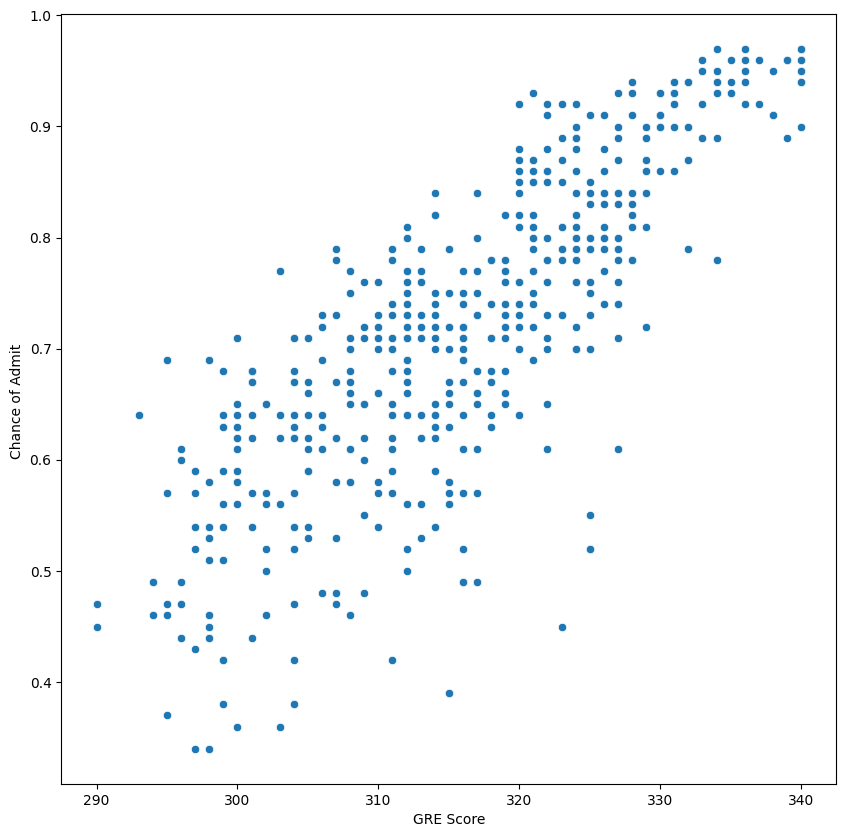

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=ad['GRE Score'],y=ad['Chance of Admit '],palette='green')

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

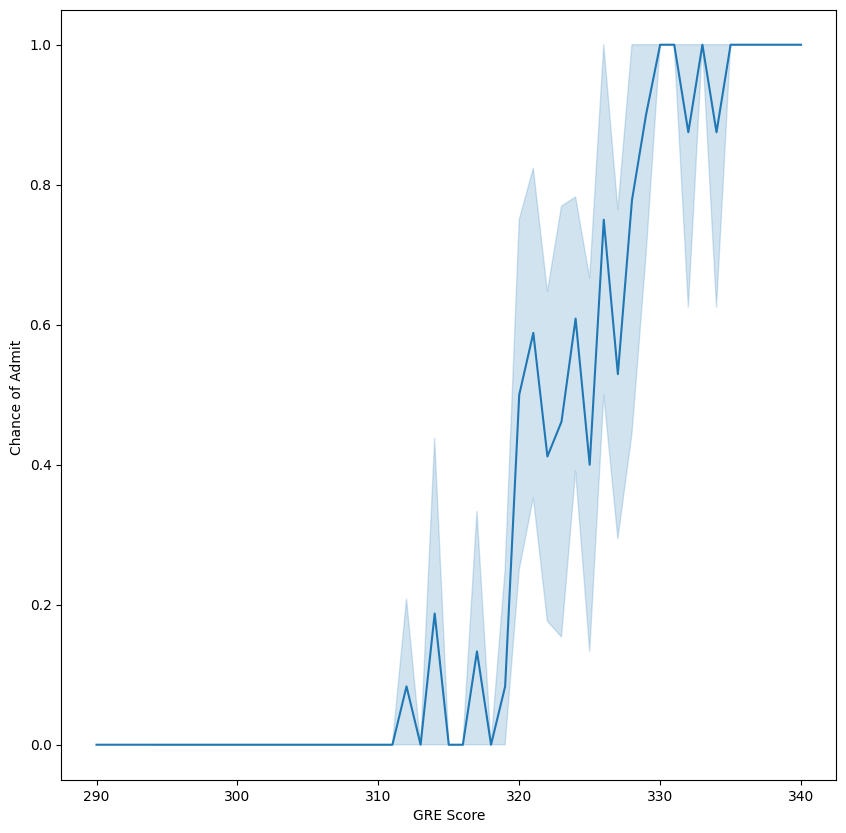

In [63]:

plt.figure(figsize=(10,10))
sns.lineplot(x=ad['GRE Score'],y=ad['Chance of Admit '])

In [43]:
ad.loc[ad['Chance of Admit ']>=0.8,'Chance of Admit ']=1
ad.loc[ad['Chance of Admit ']<0.8,'Chance of Admit ']=0

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,precision_score,recall_score,r2_score,accuracy_score
from sklearn import tree


In [45]:
x = ad.drop(columns=['Chance of Admit '],axis=1)
y = ad['Chance of Admit ']
print(y)

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64


In [46]:
model = tree.DecisionTreeClassifier()
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)


In [47]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[7] <= 0.5\ngini = 0.435\nsamples = 375\nvalue = [255, 120]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 255\nvalue = [255, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 120\nvalue = [0, 120]')]

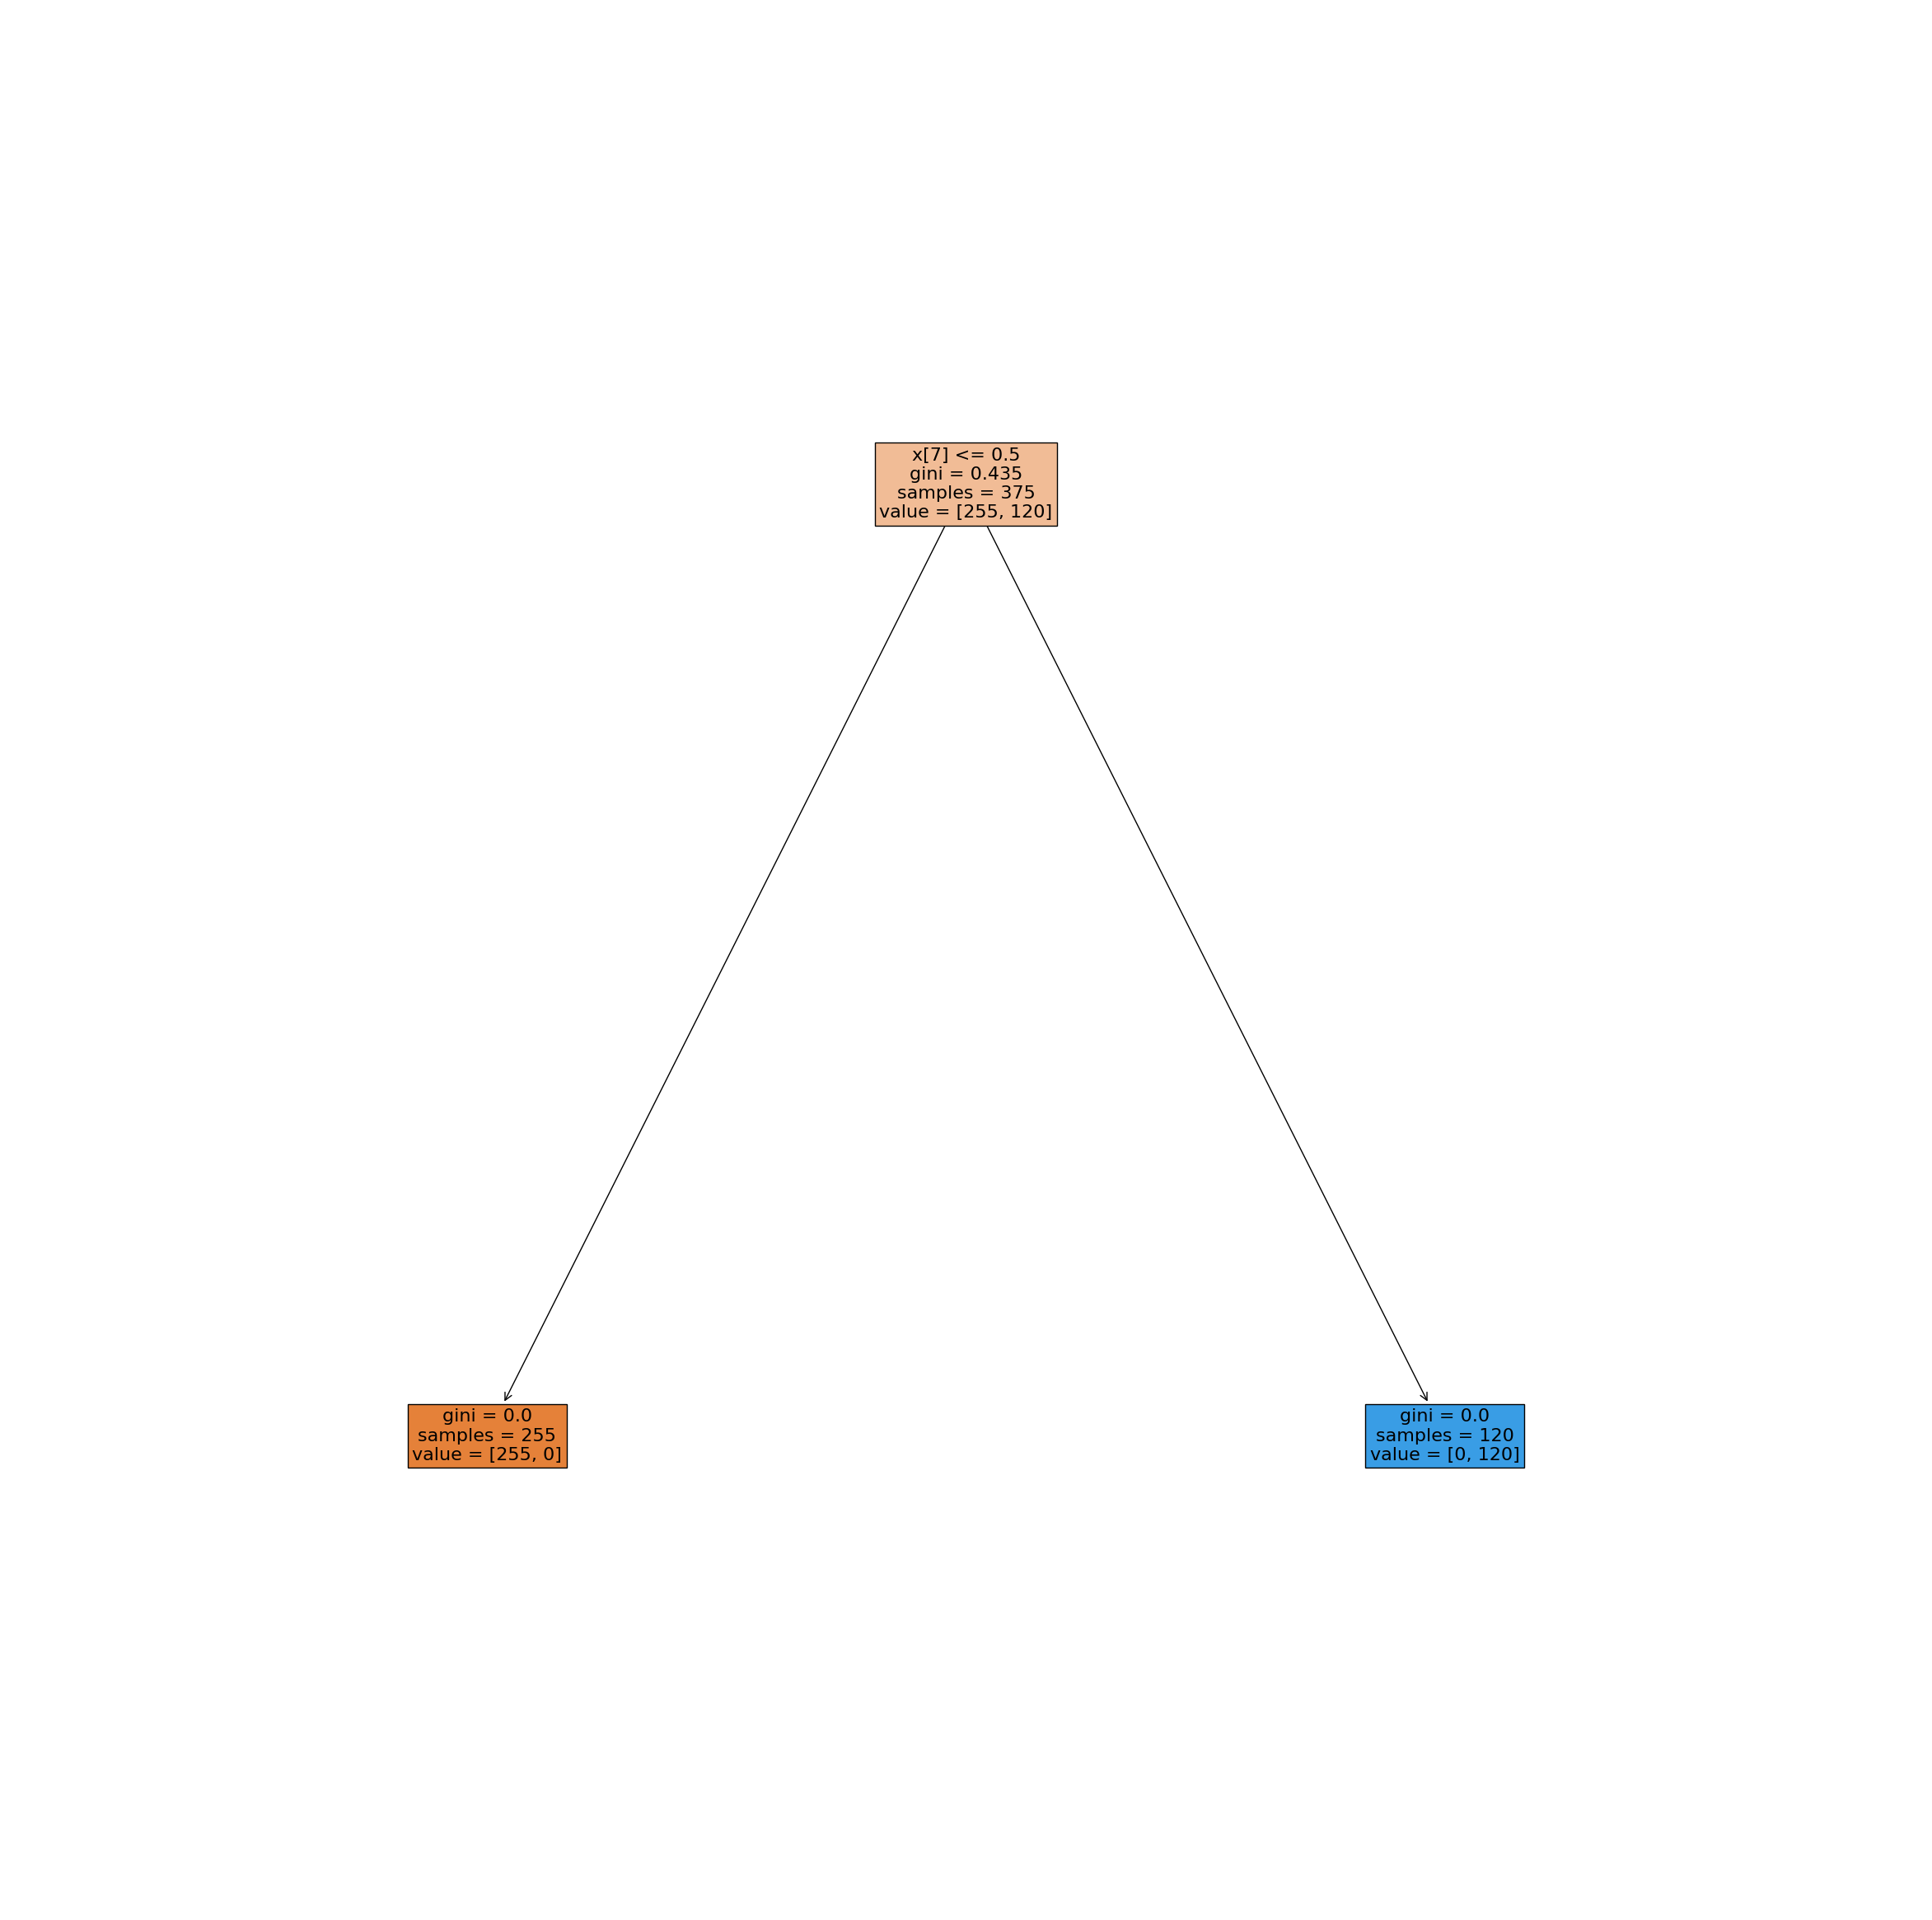

In [59]:
plt.figure(figsize=(30,30))
tree.plot_tree(model,filled=True, fontsize=16)

In [60]:
ypred = model.predict(xtest)
confusion = confusion_matrix(ytest,ypred)
confusion

array([[90,  0],
       [ 0, 35]])

<Axes: >

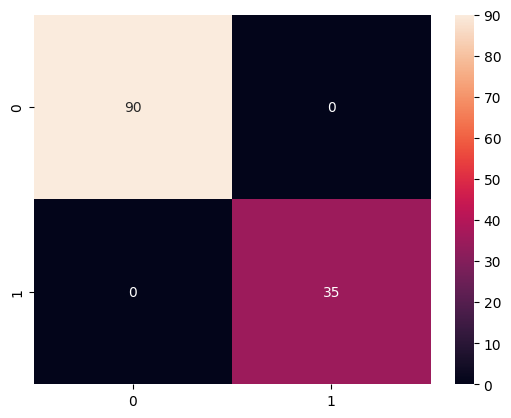

In [61]:
sns.heatmap(confusion,annot=True)

In [62]:
print("Model Accuracy Score :" ,accuracy_score(ytest, ypred)*100)
print("Model Mean Absolute Error : ",mean_absolute_error(ytest,ypred)*100)
print("Model Mean Sqaured Error : ",mean_squared_error(ytest,ypred)*100)
print("Model Precision Score : ",precision_score(ytest,ypred)*100)
print("Model Recall Score : ",recall_score(ytest,ypred)*100)
print("Model R2 Score : ",r2_score(ytest,ypred)*100)

Model Accuracy Score : 100.0
Model Mean Absolute Error :  0.0
Model Mean Sqaured Error :  0.0
Model Precision Score :  100.0
Model Recall Score :  100.0
Model R2 Score :  100.0
